# 一、互关互粉分析

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
ls=[]

with open("Travis_following.txt", "r", encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip('\n').replace('’', "'").replace('‘', "'")
        if '@' in line and len(line)<=16:
            ls.append(line)
#数据预处理
data=pd.DataFrame(ls)
data.columns=['following']
data=data.dropna().drop_duplicates().reset_index(drop=True)

def process(df):
    if df[0]=='@':
        z=df
    else:
        z=np.NaN
    return z

data['following']=data['following'].apply(lambda x:process(x))
data=data.dropna().drop_duplicates().reset_index(drop=True)

#following列表（会有多出的一些是following 的其他信息）
data

,following
0,@MetroBoomin
1,@youngthug
2,@LaflameScott
3,@trvisXX
4,@therealmikedean
...,...
786,@TiaGreenRanger
787,@AngelsThrone
788,@JimmyFloss
789,@DannieOnAir


In [13]:
#处理followers
ls=[]
with open("Travis_followers.txt", "r", encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip('\n').replace('’', "'").replace('‘', "'")
        if '@' in line and len(line)<=16:
            ls.append(line)
#数据预处理
data1=pd.DataFrame(ls)
data1.columns=['followers']
data1=data1.dropna().drop_duplicates().reset_index(drop=True)
data1['followers']=data1['followers'].apply(lambda x:process(x))
data1=data1.dropna().drop_duplicates().reset_index(drop=True)

#followers 信息
data1

,followers
0,@dreamdoll
1,@HEIRMJ
2,@madeintyo
3,@inihelene
4,@virgil_30
...,...
163,@dash_radio
164,@Rosenbergradio
165,@MTV
166,@1Xtra


In [14]:
#互关的人
ls_following=data['following'].tolist()
ls_followers=data1['followers'].tolist()
both_following=[i for i in ls_following if i in ls_followers]
print('互关比例：{}%'.format(str(round(len(both_following)/689*100,2))))

互关比例：23.22%


In [15]:
#Scott 历史推文分析
import pandas as pd
import numpy as np
ls=[]

with open("Travis_following.txt", "r", encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip('\n').replace('’', "'").replace('‘', "'")
        ls.append(line)
#数据预处理
data=pd.DataFrame(ls)
data.columns=['tweet']
data=data.dropna().drop_duplicates().reset_index(drop=True)

#历史推文大致情况
data

,tweet
0,Metro Boomin
1,@MetroBoomin
2,28 and blessed. NOT ALL HEROES WEAR CAPES
3,Young Thug ひ
4,@youngthug
...,...
2040,@DannieOnAir
2041,High voltage sign Host High voltage sign TV Pr...
2042,ساشا
2043,@itsSASHAbitchhh


In [16]:
#互动情况
ls=[]
for i in both_following:
    i=i.replace('@','')
    for j in range(len(data)):
        if i in data['tweet'][j]:
            ls.append((i,j))

df = pd.DataFrame(ls)
df.columns=['user','time']
df['user'].value_counts()
#df['user'].value_counts().to_excel('互关的人中推文提到的次数.xlsx')

MTV               6
Genius            4
Skrillex          3
Migos             3
djgregstreet      3
                 ..
DJSCREAM          1
virgil_30         1
WhoIsStevieJ      1
youngchopbeatz    1
peeweelongway     1
Name: user, Length: 160, dtype: int64

# 二、推特关键词文本分析

In [17]:
import pandas as pd
import numpy as np
ls=[]

with open("最新关键词搜索结果.txt", "r", encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip('\n').replace('’', "'").replace('‘', "'").lower()
        if "@" not in line and len(line)>=20:
            ls.append(line)

#数据预处理
data=pd.DataFrame(ls)
data.columns=['text']
data=data.dropna().drop_duplicates().reset_index(drop=True)
data
#data.to_excel('111.xlsx',index=None)

,text
0,travis scott and olivia rodrigo were among the...
1,"travis scott, olivia rodrigo's 'drivers licens..."
2,travis scott and olivia rodrigo lead google's ...
3,travis scott and yb better
4,travis scott sa ibang bansa al james sa pilipi...
...,...
2201,breaking: drake allegedly slept with kylie jen...
2202,"another bad day for drake fans, as he is accus..."
2203,pessgo purrycrossed swordspirate flagbilled cap
2204,g oublié travis scott


{'travis': 0.9046003936384216, 'scott': 0.8926895083444992, 'astroworld': 0.25138236857173046, 'interview': 0.1698868376133141, 'tragedy': 0.09152575015329838, 'face': 0.0727190891628946, 'festival': 0.07083842306385423, 'people': 0.06895775696481383, 'concert': 0.06456953606705296, '10': 0.0633157586676927, 'cacti': 0.05077798467409019, 'charlamagne': 0.046389763776329314, 'travisscott': 0.046389763776329314, 'god': 0.04576287507664919, 'seltzer': 0.04450909767728893, 'show': 0.04450909767728893, 'drake': 0.043882208977608805, 'victims': 0.04325532027792868, 'music': 0.041374654178888304, 'silence': 0.03824021068048768, 'didn': 0.03824021068048768, 'hard': 0.035732655881767175, 'rapper': 0.03447887848240692, 'fans': 0.03447887848240692, 'discontinued': 0.03322510108304667, 'radio': 0.03259821238336654, 'tears': 0.031971323683686416, 'houston': 0.031971323683686416, 'anheuser': 0.03134443498400629, 'busch': 0.030717546284326165, 'news': 0.03009065758464604, 'families': 0.03009065758464

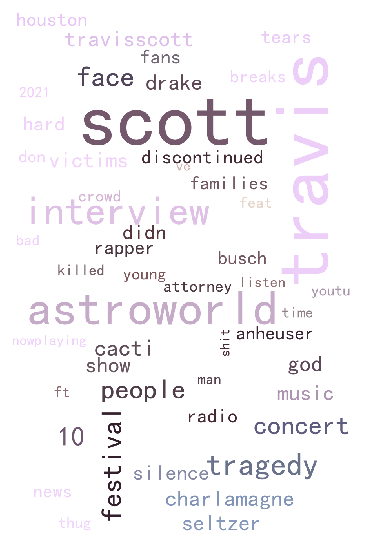

In [18]:
#词云分析
import matplotlib.pyplot as plt
import wordcloud
import jieba
from wordcloud import ImageColorGenerator
from imageio import imread 
import jieba.analyse as ana
from wordcloud import WordCloud

%matplotlib inline
jieba.add_word("travis scott")


#处理文本，去除停用词
#参数1.withWeight设置为True时可以显示词的权重         2.topK设置显示的词的个数
if __name__ == '__main__':    
     with open("推特文本.txt",encoding='utf-8') as f:
        text_read = f.read()                        #读取文件

     ana.set_stop_words('stopwords.txt')         # 输入停用词
     word_list=ana.extract_tags(text_read,topK=100,withWeight=True)      #去除停用词+词频分析
     word_dict = {}                         #转化为字典形式以便做词云图
     for i in word_list:
         word_dict[i[0]]=i[1]
        
     print(word_dict)
           
#设置词云操作对象 WordCloud
mk=imread("scott.jpg")
w = wordcloud.WordCloud(max_words=50,background_color='white',         #显示最大单词数量为50
                        font_path='simhei.ttf',      
                        random_state=50,                               
                        mask=mk)                                       #设置词云形状                           

#将txt变量传入w的generate()方法，给词云输入文字
txt=w.fit_words(word_dict)
bimColors=ImageColorGenerator(mk)
plt.figure(dpi=100,figsize=(7,7))
plt.imshow(txt.recolor(color_func=bimColors))      #显示词云图
plt.axis('off')      #不显示x、y轴

# 将词云图片导出到当前文件夹
txt.to_file("grwordcloud_recently_tweet.png")

,count,mean,std,min,25%,50%,75%,max
polarity,2206.0,0.024582,0.232052,-1.0,0.0,0.0,0.012292,1.0
subjectivity,2206.0,0.235123,0.298148,0.0,0.0,0.0,0.498106,1.0


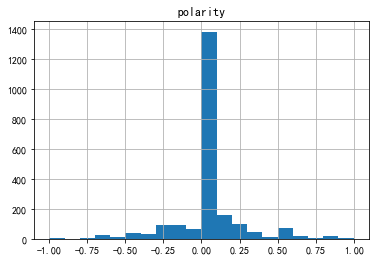

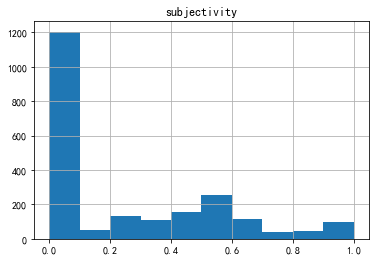

In [19]:
# 计算情感
from textblob import TextBlob

data['polarity']=data['text'].apply(lambda x:TextBlob(x).sentiment.polarity)
data['subjectivity']=data['text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
#data.to_excel('最终情感分析结果.xlsx',index=None)

#分析人们的大致观点,可以看到大部分人还是比较客观且中性
#目前网上关于scott话题都是比较客观且中性
data.hist(column='polarity',bins=20)
data.hist(column='subjectivity',bins=10)

#查看情感和客观性的描述性统计
data[['polarity','subjectivity']].describe().T

# 三、道歉文本分析

In [20]:
import pandas as pd
import numpy as np
ls=[]

with open("道歉文本.txt", "r", encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip('\n').replace('’', "'").replace('‘', "'").lower()
        if "@" not in line and len(line)>=20:
            ls.append(line)

#数据预处理
data=pd.DataFrame(ls)
data.columns=['text']
data=data.dropna().drop_duplicates().reset_index(drop=True)
data

,text
0,you're not responsible for deaths & injuries a...
1,paapa wondersflag of south africa+27782522715.
2,14 year old boy crushed to death. think about ...
3,people are placing blame on the wrong individu...
4,"""yeeeeaahhhhhhhhhhhhh"""
...,...
221,travisssss i lovi yore contant i lovi u!!!
222,tryboysam ( no sweat me cool rip roblox )
223,hi travis scott we should meet up some time i ...
224,do you really love yr fans?


In [21]:
#继续处理
ls=[]

with open("道歉处理后文本.txt", "r", encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip('\n').replace('’', "'").replace('‘', "'").lower().strip()
        if len(line)>=20:
            ls.append(line)

#数据预处理
data=pd.DataFrame(ls)
data.columns=['text']
data=data.dropna().drop_duplicates().reset_index(drop=True)
data

,text
0,you're not responsible for deaths & injuries a...
1,paapa wondersflag of south africa+27782522715.
2,14 year old boy crushed to death. think about ...
3,people are placing blame on the wrong individu...
4,"""yeeeeaahhhhhhhhhhhhh"""
...,...
221,travisssss i lovi yore contant i lovi u!!!
222,tryboysam ( no sweat me cool rip roblox )
223,hi travis scott we should meet up some time i ...
224,do you really love yr fans?


{'people': 0.29123319525781344, 'travis': 0.277026697928164, 'show': 0.14206497329649434, 'scott': 0.1278584759668449, 'concert': 0.1207552273020202, 'stop': 0.1207552273020202, 'heartred': 0.1207552273020202, 'astroworld': 0.09944548130754605, 'crowd': 0.09944548130754605, 'man': 0.07813573531307189, 'don': 0.07813573531307189, 'stopped': 0.07103248664824717, 've': 0.07103248664824717, 'heart': 0.07103248664824717, 'didn': 0.06392923798342245, 'fans': 0.06392923798342245, 'face': 0.06392923798342245, 'responsible': 0.05682598931859774, 'video': 0.05682598931859774, 'fault': 0.04972274065377302, 'devastated': 0.04972274065377302, 'happened': 0.04972274065377302, 'hands': 0.04972274065377302, 'blame': 0.04261949198894831, 'festival': 0.04261949198894831, 'music': 0.04261949198894831, 'prayers': 0.04261949198894831, 'family': 0.04261949198894831, 'interview': 0.04261949198894831, 'stage': 0.04261949198894831, 'bruh': 0.04261949198894831, 'time': 0.04261949198894831, 'love': 0.04261949198

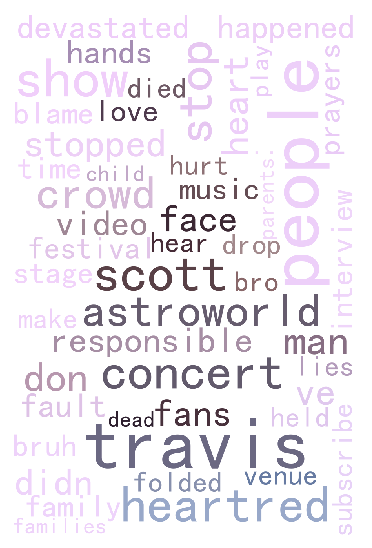

In [22]:
#词云分析
import matplotlib.pyplot as plt
import wordcloud
import jieba
from wordcloud import ImageColorGenerator
from imageio import imread 
import jieba.analyse as ana
from wordcloud import WordCloud

%matplotlib inline
jieba.add_word("travis scott")


#处理文本，去除停用词
#参数1.withWeight设置为True时可以显示词的权重         2.topK设置显示的词的个数
if __name__ == '__main__':    
     with open("道歉处理后最终文本.txt",encoding='utf-8') as f:
        text_read = f.read()                        #读取文件

     ana.set_stop_words('stopwords.txt')         # 输入停用词
     word_list=ana.extract_tags(text_read,topK=100,withWeight=True)      #去除停用词+词频分析
     word_dict = {}                         #转化为字典形式以便做词云图
     for i in word_list:
         word_dict[i[0]]=i[1]
        
     print(word_dict)
           
#设置词云操作对象 WordCloud
mk=imread("scott.jpg")
w = wordcloud.WordCloud(max_words=50,background_color='white',         #显示最大单词数量为50
                        font_path='simhei.ttf',      
                        random_state=50,                               
                        mask=mk)                                       #设置词云形状                           

#将txt变量传入w的generate()方法，给词云输入文字
txt=w.fit_words(word_dict)
bimColors=ImageColorGenerator(mk)
plt.figure(dpi=100,figsize=(7,7))
plt.imshow(txt.recolor(color_func=bimColors))      #显示词云图
plt.axis('off')      #不显示x、y轴

# 将词云图片导出到当前文件夹
txt.to_file("grwordcloud_apology.png")

,count,mean,std,min,25%,50%,75%,max
polarity,226.0,-0.000135,0.258143,-1.0,0.0,0.00000,0.098437,0.7
subjectivity,226.0,0.298819,0.320569,0.0,0.0,0.23125,0.550000,1.0


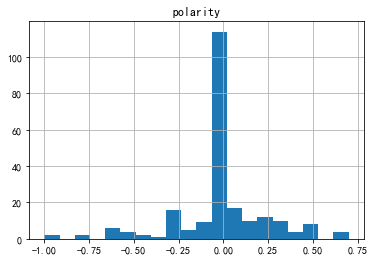

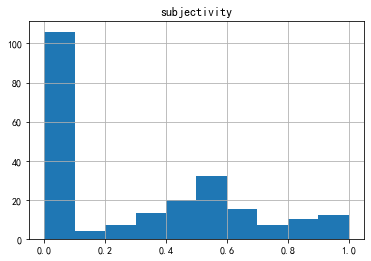

In [23]:
# 计算情感
from textblob import TextBlob

data['polarity']=data['text'].apply(lambda x:TextBlob(x).sentiment.polarity)
data['subjectivity']=data['text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
data.to_excel('道歉文本最终情感分析结果.xlsx',index=None)

#分析人们的大致观点,相比于最近话题分析
#道歉推文下的评论更加主观且负面，当时人们是比较激动的，但是最近确实被遗忘了
data.hist(column='polarity',bins=20)
data.hist(column='subjectivity',bins=10)

#查看情感和客观性的描述性统计
data[['polarity','subjectivity']].describe().T

# 四、YouTube 播放量影响分析

Text(0.5, 1, 'Variation trend of playback volume of the last 10 videos')

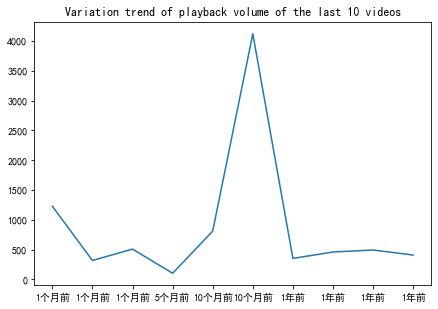

In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

ls=[]

with open("YouTube视频播放量.txt", "r", encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip('\n').replace('直播时间：', '').replace('观看', '')
        if line!='' and line!='字幕' and line!='正在播放':
            ls.append(line)

#数据预处理
data=pd.DataFrame(ls)
data.columns=['text']
data=data.dropna().reset_index(drop=True)
title=data.loc[[i for i in data.index if i%4==1]].reset_index(drop=True)
view=data.loc[[i for i in data.index if i%4==2]].reset_index(drop=True)
time=data.loc[[i for i in data.index if i%4==3]].reset_index(drop=True)
data=pd.concat([title,view],axis=1)
data=pd.concat([data,time],axis=1)
data.columns=['title','view','time']

def view_count(df):
    if '万次' in df:
        z=df.replace('万次','')
        z=float(z)
    if '亿' in df:
        z=df.replace('亿次','')
        z=float(z)*10000
    return z

data['view']=data['view'].apply(lambda x:view_count(x))

#比较出事前后播放量变化
plt
plt.plot(data['view'][:10])
_ = plt.xticks(range(10),data['time'][:10])
plt.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)
plt.title("Variation trend of playback volume of the last 10 videos")